# Figures for E-Textiles Extended Abstract

Script to generate Figures 2-3 from the 4-page extended abstract submitted to E-Textiles 2023 conference.

> [1] Brett C. Hannigan, Tyler J. Cuthbert, and Carlo Menon. "HACS4x: 4-Ply Helical Auxetic Capacitive Sensors for Strain Sensing E-textiles." *Engineering Proceedings*. 2023 (Accepted).

©2023 ETH Zurich, Brett Hannigan; D-HEST; Biomedical and Mobile Health Technology (BMHT) Lab; Carlo Menon

In [2]:
library(cowplot)
library(magick)
library(readxl)
library(ggplot2)
library(broom)
library(tidyverse)
library(rsvg)
library(pdftools)
library(patchwork)

## Import Data
### Import Data for Sensor Characterization Test
Data collected on 2023-02-27.

In [3]:

data_sample1 <- read_excel("./Synchronized/Summary.xlsx", sheet="Staircase Strain", range="A2:K9542", col_names=c("time", "position", "force", "displacement", "strain", "Zmag", "Zphase", "Cs", "Rs", "dCC0", "GF"))
data_sample1$sample <- 1
data_sample2 <- read_excel("./Synchronized/Summary.xlsx", sheet="Staircase Strain", range="L2:V9542", col_names=c("time", "position", "force", "displacement", "strain", "Zmag", "Zphase", "Cs", "Rs", "dCC0", "GF"))
data_sample2$sample <- 2
data_sample3 <- read_excel("./Synchronized/Summary.xlsx", sheet="Staircase Strain", range="W2:AG9542", col_names=c("time", "position", "force", "displacement", "strain", "Zmag", "Zphase", "Cs", "Rs", "dCC0", "GF"))
data_sample3$sample <- 3
data <- rbind(data_sample1, data_sample2, data_sample3)
head(data)

time,position,force,displacement,strain,Zmag,Zphase,Cs,Rs,dCC0,GF,sample
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,-26.86049,-0.2762349,-26.86050,0.000000e+00,39653400,-89.61500,4.013700e-12,266359.0,-3.463838e-04,NA,1
0.01,-26.86048,-0.3542472,-26.86049,5.515678e-08,39637630,-89.65174,4.015293e-12,240954.3,5.036935e-05,913.2033,1
0.02,-26.86047,-0.2733152,-26.86048,1.589671e-07,39621860,-89.68848,4.016886e-12,215549.6,4.471225e-04,2812.6734,1
0.03,-26.86047,-0.4697358,-26.86048,1.782359e-07,39606090,-89.72522,4.018479e-12,190144.9,8.438757e-04,4734.6000,1
0.04,-26.86046,-0.2495619,-26.86048,2.081024e-07,39609510,-89.70050,4.018157e-12,207241.2,7.636783e-04,3669.7235,1
0.05,-26.86047,-0.2770033,-26.86048,1.577628e-07,39614500,-89.67076,4.017677e-12,227821.8,6.441293e-04,4082.8971,1


### Import Data from Model
Data produced with the model code: https://gitlab.ethz.ch/BMHT/materials/4-hay-model

In [4]:
model_data <- read_excel("./Model/Model Data.xlsx", range="A2:D101", col_names=c("strain", "Cs", "dCC0", "GF"))
model_data$sample = 4
head(model_data)

strain,Cs,dCC0,GF,sample
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.000000000,6.719742e-11,0.000000000,NA,4
0.005050505,6.766875e-11,0.007014112,1.388794,4
0.010101010,6.814325e-11,0.014075339,1.393459,4
0.015151515,6.862098e-11,0.021184630,1.398186,4
0.020202020,6.910200e-11,0.028342954,1.402976,4
0.025252525,6.958638e-11,0.035551309,1.407832,4


## Figure 2
### Generate Plots for Figure 2

Warning message:
"Removed 1023 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 16 rows containing missing values (`geom_path()`)."


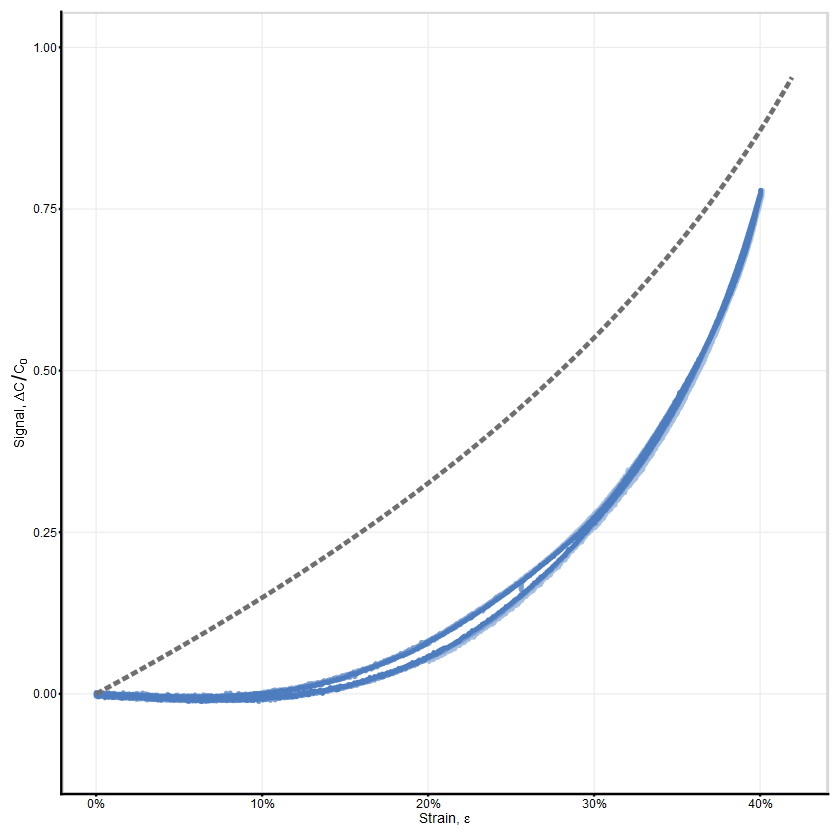

In [17]:
plt1 <- ggplot(data=data, aes(x=strain, y=dCC0, group=as.factor(sample), color=as.factor(sample)))
plt1 <- plt1 + geom_path(linewidth=1)
plt1 <- plt1 + geom_path(data=model_data, mapping=aes(x=strain, y=dCC0), linewidth=1, colour="#6F6F6F", linetype="longdash")
#plt <- plt + stat_smooth(method="gam", formula=y ~ s(x,t), span=10)
plt1 <- plt1 + scale_x_continuous(limits=c(0, 0.42), labels = scales::percent_format(scale = 100))
plt1 <- plt1 + scale_y_continuous(limits=c(-0.1, 1))
plt1 <- plt1 + scale_color_manual(values=c("#A6BEDF", "#7A9DCF", "#4D7DBF"), name="Trial", guide="none")
plt1 <- plt1 + theme_cowplot(6) + theme(plot.margin = unit(c(0.25,0.25,0.25,0.25), "cm"))
plt1 <- plt1 + ylab(expression('Signal,'~Delta*C/C[0]))
plt1 <- plt1 + xlab(expression("Strain,"~epsilon))
plt1 <- plt1 + panel_border() + background_grid(major="xy", minor=NA, size.major=0.25)
plt1 <- plt1 + theme(panel.grid.major = element_line(colour="#EBEBEB", linewidth=0.25))
plt1 <- plt1 + theme(plot.background = element_rect(fill='white', colour='white'), text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))

print(plt1)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 4905 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 30 rows containing missing values (`geom_path()`)."


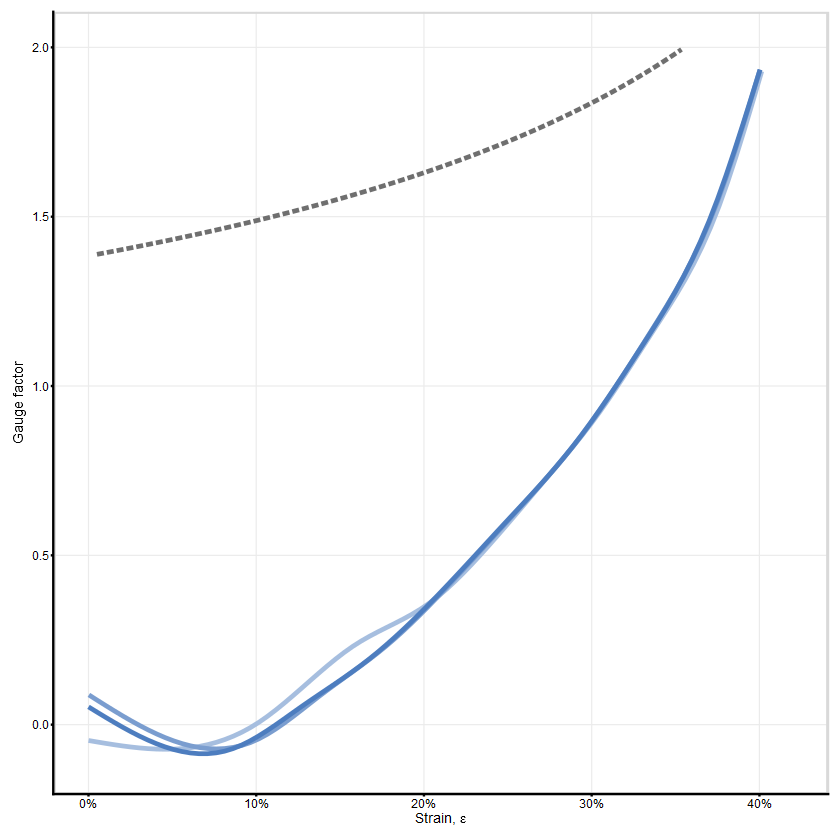

In [16]:
plt2 <- ggplot(data=data, aes(x=strain, y=GF, group=as.factor(sample), color=as.factor(sample)))
plt2 <- plt2 + stat_smooth(span=100, fill="white")
plt2 <- plt2 + geom_path(data=model_data, mapping=aes(x=strain, y=GF), size=1, colour="#6F6F6F", linetype="longdash")
plt2 <- plt2 + scale_x_continuous(limits=c(0, 0.42), labels = scales::percent_format(scale = 100))
plt2 <- plt2 + scale_y_continuous(limits=c(-0.1, 2))
plt2 <- plt2 + scale_color_manual(values=c("#A6BEDF", "#7A9DCF", "#4D7DBF"), name="Trial", guide="none")
plt2 <- plt2 + theme_cowplot(6) + theme(plot.margin = unit(c(0.25,0.25,0.25,0.25), "cm"))
plt2 <- plt2 + ylab(expression('Gauge factor'))
plt2 <- plt2 + xlab(expression("Strain,"~epsilon))
plt2 <- plt2 + panel_border() + background_grid(major="xy", minor=NA, size.major=0.25)
plt2 <- plt2 + theme(panel.grid.major = element_line(colour="#EBEBEB", linewidth=0.25))
plt2 <- plt2 + theme(plot.background = element_rect(fill='white', colour='white'), text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))
                                  
print(plt2)

### Compile and Export Figure 2

Warning message:
"Removed 1023 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 16 rows containing missing values (`geom_path()`)."
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 4905 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 30 rows containing missing values (`geom_path()`)."


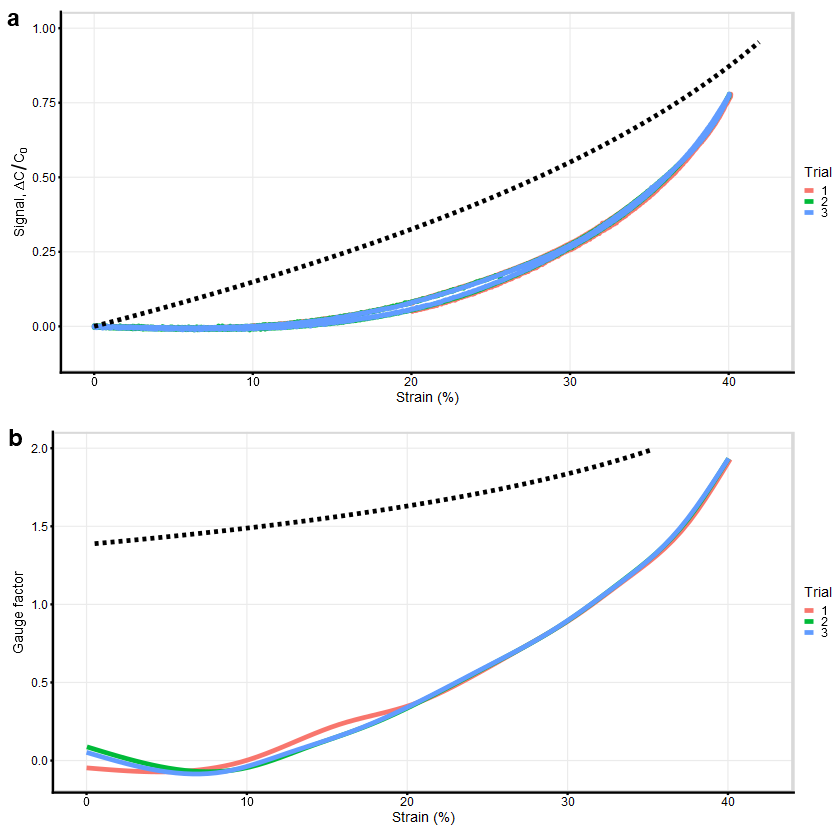

In [182]:
fig2 <- plot_grid(plt1, plt2, nrow=2, rel_heights=c(1, 1), labels=c("a", "b"), align="t")
print(fig2)
ggsave('Fig2-Extended.png', width=45, height=60, units="mm", scale=1.5, bg="white", dpi=600)

## Import Data for Long-Term Durability Test
Data collected on 2023-02-27.

In [18]:
data_cyclic <- read_excel("./Synchronized/Summary.xlsx", sheet="Cyclic", skip=1, col_names=c("time", "position", "force", "displacement", "strain", "Zmag", "Zphase", "Cs", "Rs", "dCC0", "GF"))
head(data_cyclic)

time,position,force,displacement,strain,Zmag,Zphase,Cs,Rs,dCC0,GF
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,-26.86794,0.06597955,-26.86795,0.000000e+00,39884800,-89.63200,3.990400e-12,256303.0,0.0012839054,NA
0.01,-26.86890,0.01132488,-26.86891,-8.092645e-06,39905820,-89.63526,3.988311e-12,254048.1,0.0007597268,-93.87868
0.02,-26.86967,-0.05728565,-26.86968,-1.456808e-05,39926850,-89.63853,3.986221e-12,251793.1,0.0002352973,-16.15157
0.03,-26.87042,-0.03341120,-26.87043,-2.083877e-05,39947870,-89.64179,3.984132e-12,249538.2,-0.0002888812,13.86268
0.04,-26.87088,-0.02740882,-26.87090,-2.476794e-05,39952480,-89.66197,3.983672e-12,235473.0,-0.0004043059,16.32376
0.05,-26.87134,-0.07200520,-26.87135,-2.857266e-05,39955980,-89.68328,3.983322e-12,220613.2,-0.0004921290,17.22377


## Figure 3
### Generate Plot for Figure 3

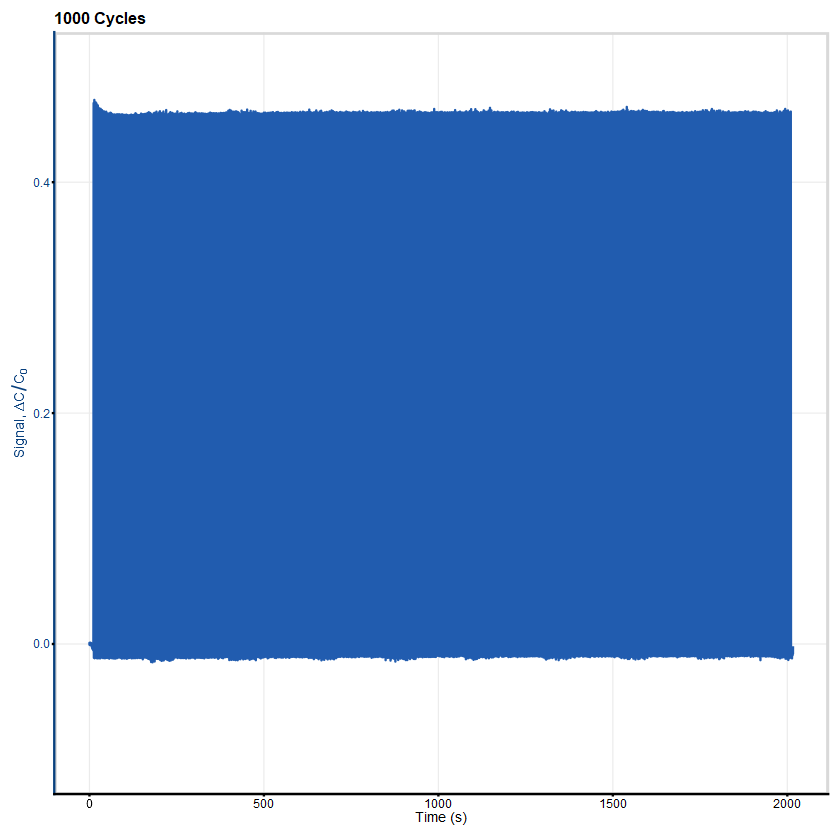

In [22]:
plt3 <- ggplot(data=data_cyclic, aes(x=time, y=dCC0))
plt3 <- plt3 + geom_path(linewidth=0.5, colour="#215CAF")
#plt3 <- plt3 + scale_x_continuous(limits=c(0, 0.42), labels=function(x)x*100)
plt3 <- plt3 + scale_y_continuous(limits=c(-0.1, 0.5))
plt3 <- plt3 + theme_cowplot(6) + theme(plot.margin = unit(c(0.25,0.25,0.25,0.25), "cm"))
plt3 <- plt3 + ylab(expression('Signal,'~Delta*C/C[0]))
plt3 <- plt3 + xlab(expression('Time (s)'))
plt3 <- plt3 + ggtitle("1000 Cycles")
plt3 <- plt3 + panel_border() + background_grid(major="xy", minor=NA, size.major=0.25)
plt3 <- plt3 + theme(panel.grid.major = element_line(colour="#EBEBEB", linewidth=0.25), axis.title.y = element_text(colour = "#08407E"), axis.text.y = element_text(color = "#08407E"), axis.line.y = element_line(color = "#08407E"))
plt3 <- plt3 + theme(plot.background = element_rect(fill='white', colour='white'), text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))

print(plt3)

Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."


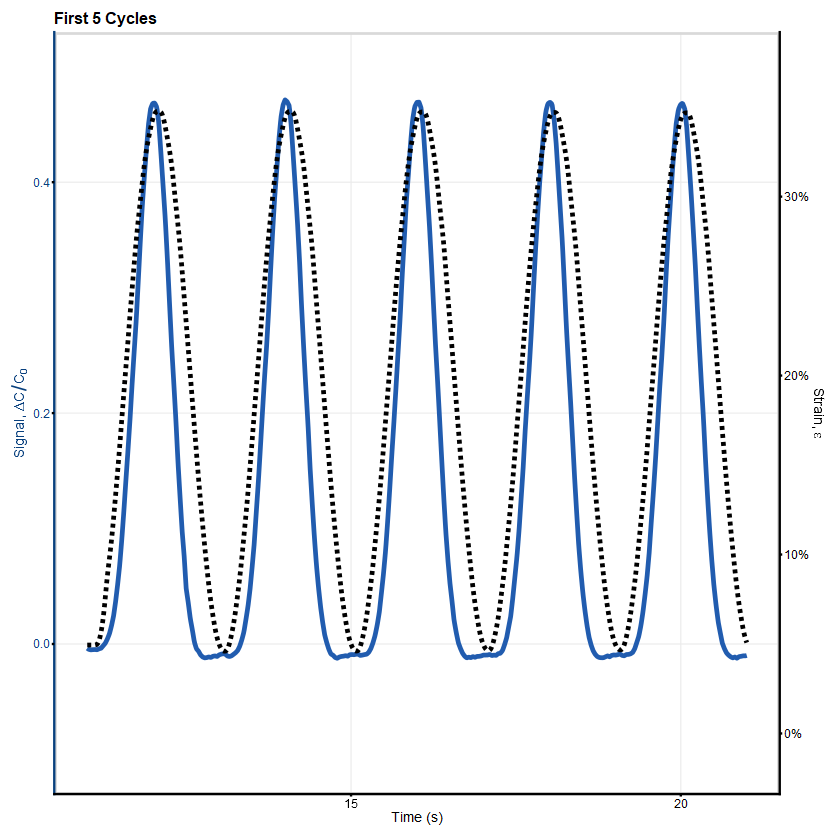

In [31]:
plt4 <- ggplot(data=data_cyclic, aes(x=time, y=dCC0))
plt4 <- plt4 + geom_path(linewidth=1, colour="#215CAF")
plt4 <- plt4 + geom_path(aes(x=time, y=(strain-0.05)*1.55), linewidth=1, linetype="dashed")
plt4 <- plt4 + scale_x_continuous(limits=c(11, 21), breaks=c(10, 15, 20))
plt4 <- plt4 + scale_y_continuous(limits=c(-0.1, 0.5), sec.axis=sec_axis(~./1.55+0.05, labels = scales::label_percent(), name=expression("Strain,"~epsilon)))
plt4 <- plt4 + theme_cowplot(6) + theme(plot.margin = unit(c(0.25,0.25,0.25,0.25), "cm"))
plt4 <- plt4 + ylab(expression('Signal,'~Delta*C/C[0]))
plt4 <- plt4 + xlab(expression('Time (s)'))
plt4 <- plt4 + ggtitle("First 5 Cycles")
plt4 <- plt4 + panel_border() + background_grid(major="xy", minor=NA, size.major=0.25)
plt4 <- plt4 + theme(panel.grid.major = element_line(colour="#EBEBEB", linewidth=0.25), axis.title.y.left = element_text(colour = "#08407E"), axis.text.y.left = element_text(color = "#08407E"), axis.line.y.left = element_line(color = "#08407E"))
plt4 <- plt4 + theme(plot.background = element_rect(fill='white', colour='white'), text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))

print(plt4)

Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."


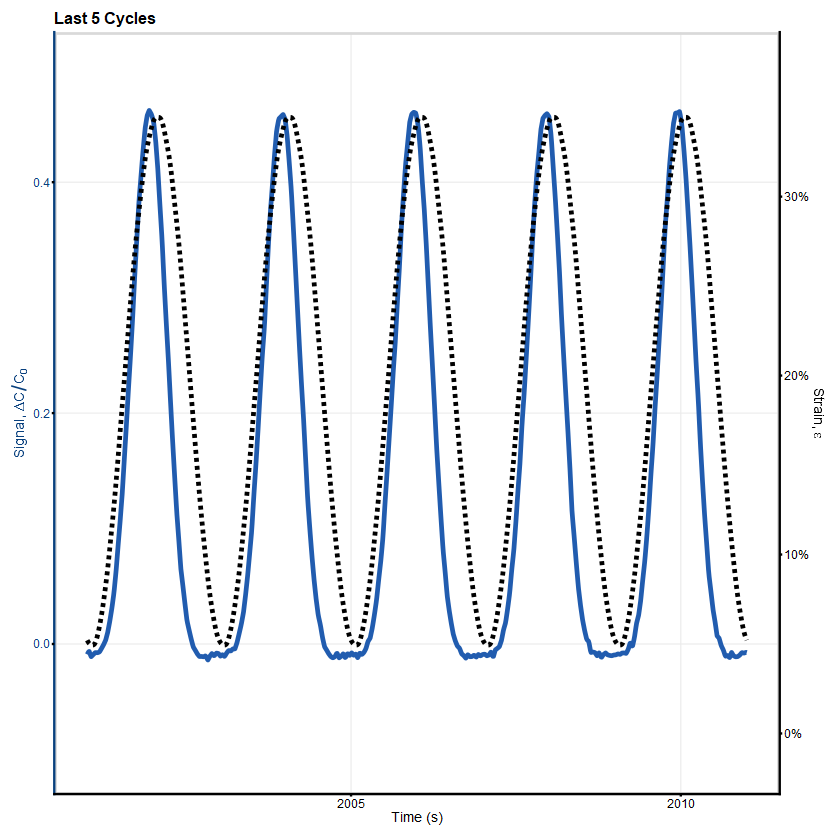

In [32]:
plt5 <- ggplot(data=data_cyclic, aes(x=time, y=dCC0))
plt5 <- plt5 + geom_path(linewidth=1, colour="#215CAF")
plt5 <- plt5 + geom_path(aes(x=time, y=(strain-0.05)*1.55), linewidth=1, linetype="dashed")
plt5 <- plt5 + scale_x_continuous(limits=c(2001, 2011), breaks=c(2000, 2005, 2010))
plt5 <- plt5 + scale_y_continuous(limits=c(-0.1, 0.5), sec.axis=sec_axis(~./1.55+0.05, labels = scales::label_percent(), name=expression("Strain,"~epsilon)))
plt5 <- plt5 + theme_cowplot(6) + theme(plot.margin = unit(c(0.25,0.25,0.25,0.25), "cm"))
plt5 <- plt5 + ylab(expression('Signal,'~Delta*C/C[0]))
plt5 <- plt5 + xlab(expression('Time (s)'))
plt5 <- plt5 + ggtitle("Last 5 Cycles")
plt5 <- plt5 + panel_border() + background_grid(major="xy", minor=NA, size.major=0.25)
plt5 <- plt5 + theme(panel.grid.major = element_line(colour="#EBEBEB", linewidth=0.25), axis.title.y.left = element_text(colour = "#08407E"), axis.text.y.left = element_text(color = "#08407E"), axis.line.y.left = element_line(color = "#08407E"))
plt5 <- plt5 + theme(plot.background = element_rect(fill='white', colour='white'), text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))

print(plt5)

### Compile and Export Figure 3

Warning message:
"Removed 1023 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 16 rows containing missing values (`geom_path()`)."
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 4905 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 30 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
"semi-transparency is not supported on this device: reported only once per page"


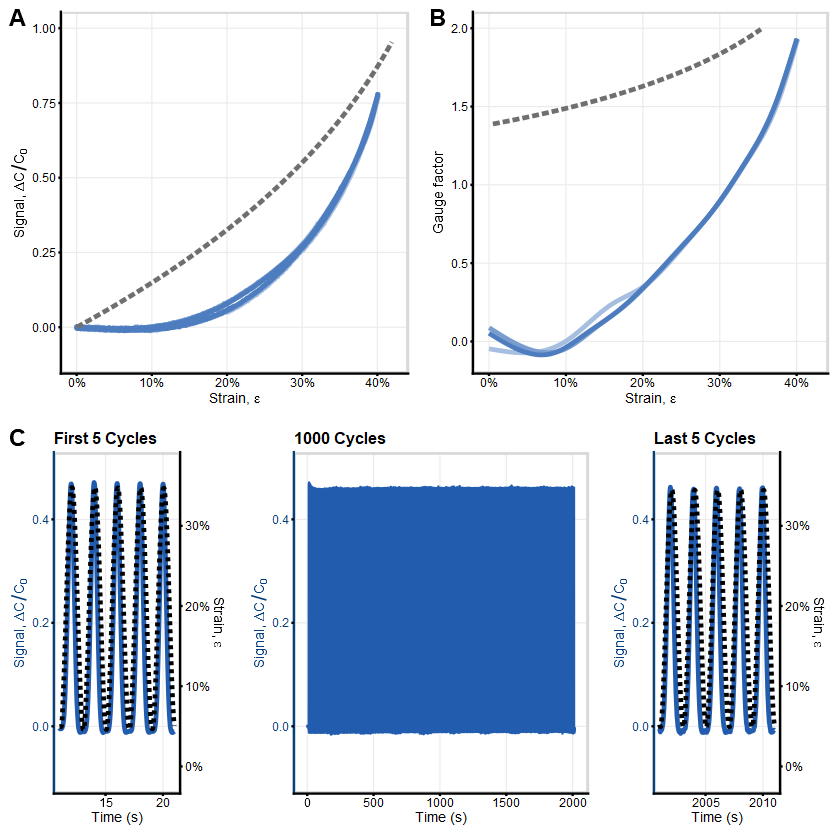

In [45]:
top_row <- plot_grid(plt1, plt2, nrow=1, labels=c("A", "B"))
bottom_row <- plot_grid(plt4, plt3, plt5, nrow=1, rel_widths=c(1, 1.5, 1))
fig <- plot_grid(top_row, bottom_row, nrow=2, labels=c("", "C"), rel_heights=c(1,1))
print(fig)
ggsave('HACS4X-Tests.png', device="png", width=120, height=80, units="mm", scale=1.5, bg="white", dpi=600)
ggsave('HACS4X-Tests.eps', device="eps", width=120, height=80, units="mm", scale=1.5, bg="white")

Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 200636 rows containing missing values (`geom_path()`)."


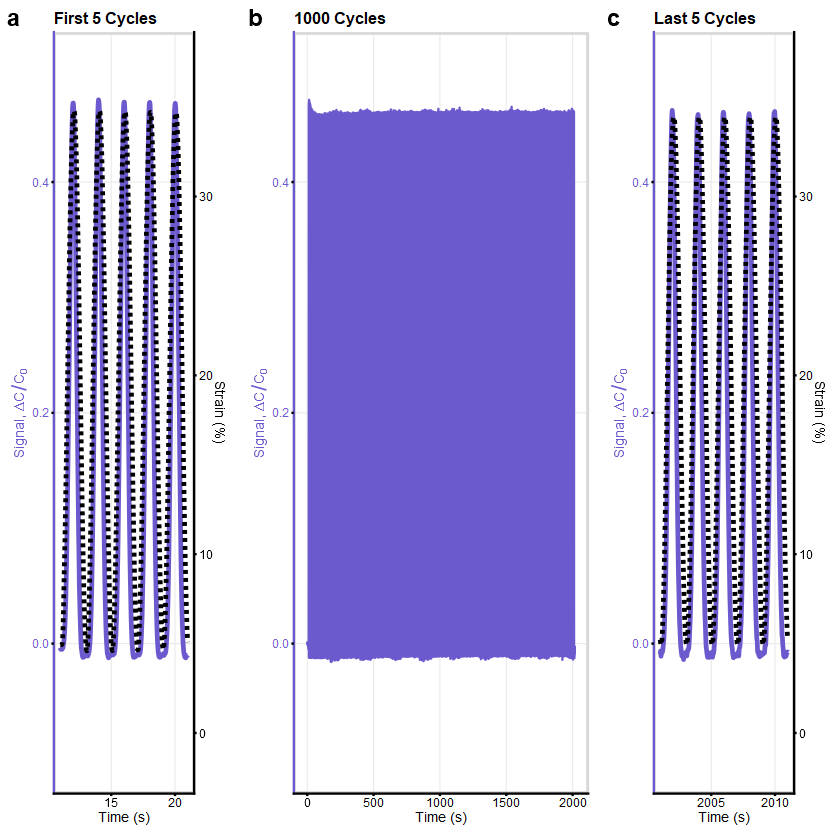

In [181]:
fig3 <- plot_grid(plt4, plt3, plt5, nrow=1, rel_widths=c(1, 1.5, 1), labels=c("a", "b", "c"), align="t")
print(fig3)
ggsave('Fig3-Extended.png', width=120, height=40, units="mm", scale=1.5, bg="white", dpi=600)